<a href="https://colab.research.google.com/github/apatino16/NaturalLanguageProcessing/blob/main/APatino_Homework7_%5BNLP%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Natural Language Processing* - Winter 2024 - Homework 1
> By Anny Patino


In [218]:
# Necessary Drives
from gensim.models import word2vec, KeyedVectors
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


In [29]:
# GoogleNews Word2Vec file
from google.colab import drive
# drive.mount('/content/drive')

path = "/content/drive/MyDrive/ColabNotebooks/GoogleNews-vectors-negative300.bin"

model = KeyedVectors.load_word2vec_format(path, binary=True, limit=200000)

In [6]:
# For Problems 2 and 3
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


## Problem 1

Using the ‘GoogleNews’ Word2Vec vector file, perform the following vector math.

In [34]:
Vec1 = model['Marie_Curie'] - model['physics'] + model['politics']
model.most_similar([Vec1])

[('Marie_Curie', 0.6391899585723877),
 ('politics', 0.45687681436538696),
 ('Sue_Ryder', 0.4075208604335785),
 ('Breakthrough_Breast_Cancer', 0.37573352456092834),
 ('Margaret_Thatcher', 0.3684638738632202),
 ('Marie_Curie_Cancer', 0.3580324947834015),
 ('politicians', 0.34992516040802),
 ('Breast_Cancer_Care', 0.34824055433273315),
 ('Mrs_Thatcher', 0.3457459509372711),
 ('politicans', 0.3389205038547516)]

In [35]:
Vec2 = model['Cowboys'] - model['Dallas'] + model['Miami']
model.most_similar([Vec2])

[('Cowboys', 0.7327904105186462),
 ('Dolphins', 0.7073556780815125),
 ('Miami_Dolphins', 0.6461875438690186),
 ('Broncos', 0.6419293284416199),
 ('Seminoles', 0.6188381910324097),
 ('Gators', 0.6109528541564941),
 ('Hokies', 0.592700719833374),
 ('Dallas_Cowboys', 0.5866430997848511),
 ('Sooners', 0.586640477180481),
 ('Cleveland_Browns', 0.5844414234161377)]

In [36]:
Vec3 = model['Sacramento'] - model['California'] + model['Colorado']
model.most_similar([Vec3])

[('Denver', 0.7687566876411438),
 ('Colorado', 0.7621335983276367),
 ('Sacramento', 0.7206397652626038),
 ('Grand_Junction', 0.6696534752845764),
 ('Fort_Collins', 0.6669073104858398),
 ('Boulder', 0.6501880288124084),
 ('Colorado_Springs', 0.6477945446968079),
 ('Pueblo', 0.6256301403045654),
 ('Spokane', 0.6246552467346191),
 ('Gunnison', 0.6222272515296936)]

In [37]:
Vec4 = model['Cowboys'] - model['Dallas'] + model['San_Francisco']
model.most_similar([Vec4])

[('Cowboys', 0.71146559715271),
 ('Giants', 0.6826241612434387),
 ('Niners', 0.6466032266616821),
 ('##ers', 0.643872857093811),
 ('San_Francisco_##ers', 0.6088259816169739),
 ('Oakland_Raiders', 0.6043734550476074),
 ('Broncos', 0.5943415760993958),
 ('Raiders', 0.5565467476844788),
 ('Seahawks', 0.5484771728515625),
 ('Dallas_Cowboys', 0.5368008017539978)]

## Problem 2
Using the ‘GoogleNews’ Word2Vec vectors compute the similarity between the following words.

* beautiful, gorgeous
* beautiful, dazzling
* beautiful, splendid
* beautiful, magnificent
* beautiful, ugly

Next, compute the similarity between all the 6 words.

In [38]:
pairs = [('beautiful', 'gorgeous'),
  ('beautiful', 'dazzling'),
  ('beautiful', 'splendid'),
  ('beautiful', 'magnificent'),
  ('beautiful', 'ugly')]

for w1, w2 in pairs:
  print('%r \t %r \t %.4f' % (w1, w2, wv.similarity(w1, w2)))

'beautiful' 	 'gorgeous' 	 0.8353
'beautiful' 	 'dazzling' 	 0.4795
'beautiful' 	 'splendid' 	 0.5533
'beautiful' 	 'magnificent' 	 0.6591
'beautiful' 	 'ugly' 	 0.3344


In [39]:
def computeSimilarity(w):
  sM = np.zeros((len(w), len(w)))

  for i in range(len(w)):
    for j in range(len(w)):
      sM[i, j] = wv.similarity(w[i], w[j])
  return sM

In [41]:
words1 = ['beautiful', 'gorgeous', 'dazzling', 'splendid', 'magnificent', 'ugly']
simMatrix = computeSimilarity(words1)
print(simMatrix)

[[1.         0.83530039 0.47949681 0.55334407 0.65914023 0.33444342]
 [0.83530039 0.99999994 0.52978837 0.55063331 0.60700852 0.29833746]
 [0.47949681 0.52978837 1.         0.66154236 0.62190461 0.21685989]
 [0.55334407 0.55063331 0.66154236 1.00000012 0.84087634 0.22497056]
 [0.65914023 0.60700852 0.62190461 0.84087634 0.99999994 0.22572012]
 [0.33444342 0.29833746 0.21685989 0.22497056 0.22572012 1.        ]]


## Problem 3

Which words do not belong to this group? Proved by comparing their Word2Vec vectors and computing the similarity between them.

* False, fake, fraudulent, counterfeit, spurious, true

In [43]:
words2 = ['false', 'fake', 'fraudulent', 'counterfeit', 'spurious', 'true']
print(wv.doesnt_match(words2))

true


In [44]:
simMatrix = computeSimilarity(words2)
print(simMatrix)

[[1.         0.55566651 0.58060157 0.32979789 0.53721178 0.37094328]
 [0.55566651 1.         0.56097305 0.61354744 0.43347082 0.28052571]
 [0.58060157 0.56097305 0.99999994 0.48740029 0.40782991 0.23345369]
 [0.32979789 0.61354744 0.48740029 1.         0.32145473 0.15660341]
 [0.53721178 0.43347082 0.40782991 0.32145473 1.         0.28230762]
 [0.37094328 0.28052571 0.23345369 0.15660341 0.28230762 0.99999994]]


## Problem 4
Compute the similarity between the following 2 words using the ‘Wiki-words’ Word2Vec file.
* Coke & Pepsi

In [47]:
embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")

In [48]:
words = ['Coke', 'Pepsi']
embedding = embed(words)
print(embedding.shape)

(2, 250)


In [50]:
similarity = np.zeros((len(words), len(words)))

for i in range(len(words)):
  for j in range(len(words)):
    similarity[i, j] = np.inner(embedding[i], embedding[j])
print('Similarity Matrix')
print(similarity)

Similarity Matrix
[[1.         0.62521559]
 [0.62521559 1.        ]]


## Problem 5

For the following text, write Python code to compute the Skip-Ngram dataset for window size = 1,2,3.

Text: data science professionals have promising career path

In [103]:
# corpus
corpus = ['data science professionals have promising career path']

In [87]:
# Generate label using skipgram
word2int = {}

for i, word in enumerate(words):
  word2int[word] = i

sentences = []
for sentence in corpus:
  sentences.append(sentence.split())

WINDOW_SIZE = 1

skipNgram_data = []

for sentence in sentences:
  for idx, word in enumerate(sentence):
    for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1]:
      if neighbor != word:
        skipNgram_data.append([word, neighbor])

In [85]:
# skipgram Window Size 1
print('Window Size = ', WINDOW_SIZE)
print('Number of Entries', len(skipNgram_data))
skipNgram_df = pd.DataFrame(skipNgram_data, columns = ['input', 'label'])
print(skipNgram_df)

Window Size =  1
Number of Entries 12
            input          label
0            data        science
1         science           data
2         science  professionals
3   professionals        science
4   professionals           have
5            have  professionals
6            have      promising
7       promising           have
8       promising         career
9          career      promising
10         career           path
11           path         career


In [113]:
# Generate label using skipgram
word2int_W2 = {}

for i, word in enumerate(words):
  word2int_W2[word] = i

sentences = []
for sentence in corpus:
  sentences.append(sentence.split())

WINDOW_SIZE = 2

skipNgram_data = []

for sentence in sentences:
  for idx, word in enumerate(sentence):
    for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1]:
      if neighbor != word:
        skipNgram_data.append([word, neighbor])

In [114]:
# skipgram Window Size 2
print('Window Size = ', WINDOW_SIZE)
print('Number of Entries', len(skipNgram_data))
skipNgram_df = pd.DataFrame(skipNgram_data, columns = ['input', 'label'])
print(skipNgram_df)

Window Size =  2
Number of Entries 22
            input          label
0            data        science
1            data  professionals
2         science           data
3         science  professionals
4         science           have
5   professionals           data
6   professionals        science
7   professionals           have
8   professionals      promising
9            have        science
10           have  professionals
11           have      promising
12           have         career
13      promising  professionals
14      promising           have
15      promising         career
16      promising           path
17         career           have
18         career      promising
19         career           path
20           path      promising
21           path         career


In [91]:
# Generate label using skipgram
word2int = {}

for i, word in enumerate(words):
  word2int[word] = i

sentences = []
for sentence in corpus:
  sentences.append(sentence.split())

WINDOW_SIZE = 3

skipNgram_data = []

for sentence in sentences:
  for idx, word in enumerate(sentence):
    for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1]:
      if neighbor != word:
        skipNgram_data.append([word, neighbor])

In [92]:
# skipgram Window Size 3
print('Window Size = ', WINDOW_SIZE)
print('Number of Entries', len(skipNgram_data))
skipNgram_df = pd.DataFrame(skipNgram_data, columns = ['input', 'label'])
print(skipNgram_df)

Window Size =  3
Number of Entries 30
            input          label
0            data        science
1            data  professionals
2            data           have
3         science           data
4         science  professionals
5         science           have
6         science      promising
7   professionals           data
8   professionals        science
9   professionals           have
10  professionals      promising
11  professionals         career
12           have           data
13           have        science
14           have  professionals
15           have      promising
16           have         career
17           have           path
18      promising        science
19      promising  professionals
20      promising           have
21      promising         career
22      promising           path
23         career  professionals
24         career           have
25         career      promising
26         career           path
27           path           have
28   

## Problem 6

For the Skip-Ngram generated in the previous problem, write Python code to generate 1-hot encoded (input & output) data for window size = 2.

In [153]:
# Corpus
corpus = ['data science professionals have promising career path']

# Split the corpus into a list of words
words = corpus[0].split()

# Create a sorted set of unique words to build the vocabulary
vocab = sorted(set(words))
vocab_size = len(vocab)

# Create a mapping of words to unique indices
word2int = {word: idx for idx, word in enumerate(vocab)}

# Function to convert word indices to one-hot encoded vectors
def to_one_hot_encoding(word_index):
    one_hot = np.zeros(vocab_size)
    one_hot[word_index] = 1
    return one_hot

# Initialize the Skip-Gram pairs list
skip_grams = []

# Define the window size for the context words
WINDOW_SIZE = 2

# Iterate over each word in the corpus
for i, target_word in enumerate(words):
    # Get the context words within the window size
    for j in range(max(0, i - WINDOW_SIZE), min(len(words), i + WINDOW_SIZE + 1)):
        if i != j:  # Avoid the target word itself
            context_word = words[j]
            skip_grams.append([to_one_hot_encoding(word2int[target_word]), to_one_hot_encoding(word2int[context_word])])

# Convert the Skip-Gram pairs to a DataFrame for easier visualization
df_skip_grams = pd.DataFrame(skip_grams, columns=['input', 'label'])

# Display the word to index mapping and the DataFrame
print('Window Size = ', WINDOW_SIZE)
print('Number of Entries', len(skipNgram_data))
print(skipNgram_df)
print()
print(word2int)
print()
print(df_skip_grams.head(len(skip_grams)))

Window Size =  2
Number of Entries 22
            input          label
0            data        science
1            data  professionals
2         science           data
3         science  professionals
4         science           have
5   professionals           data
6   professionals        science
7   professionals           have
8   professionals      promising
9            have        science
10           have  professionals
11           have      promising
12           have         career
13      promising  professionals
14      promising           have
15      promising         career
16      promising           path
17         career           have
18         career      promising
19         career           path
20           path      promising
21           path         career

{'career': 0, 'data': 1, 'have': 2, 'path': 3, 'professionals': 4, 'promising': 5, 'science': 6}

                                  input                                label
0   [0.0, 1.0, 0.0, 0.0, 0.

## Problem 7

Build a Deep Learning Neural Network using Keras to generate Word2Vec vectors for the given corpus.
First compute a Skip-Ngram dataset of the corpus. Then generate 1-hot encoded data for the input and
output data generated by Ski-Ngram for a window size of 2. Optimize the Neural Network weights
using the backpropagation algorithm.

The hidden layer of your Neural Network should have 2 neurons. Display the Word2Vec vectors in a 2-
dimensional cartesian coordinates plot. Plot of the vectors will show that the words which are close to
each other in corpus will be close in the plot.

In [185]:
corpus = ['I like deep Learning.', 'I like NLP.', 'I enjoy flying.']

In [191]:
# Remove Stop Words
def remove_stop_words(corpus):
  stop_words = ['I', 'like']
  results = []
  for text in corpus:
    tmp = text.split(' ')
    for stop_word in stop_words:
      if stop_word in tmp:
        tmp.remove(stop_word)
    results.append(" ".join(tmp))
  return results

In [192]:
corpus = remove_stop_words(corpus)
print(corpus)

['deep Learning.', 'NLP.', 'enjoy flying.']


In [193]:
# Tokenize
words = []
for text in corpus:
  for word in text.split(' '):
    words.append(word)

words = sorted(set(words))
print(words)
print('Total words= ', len(words))

['Learning.', 'NLP.', 'deep', 'enjoy', 'flying.']
Total words=  5


In [194]:
# Generate label using skipgram
word2int = {}

for i, word in enumerate(words):
  word2int[word] = i

sentences = []
for sentence in corpus:
  sentences.append(sentence.split())

WINDOW_SIZE = 2

skipNgram_data = []

for sentence in sentences:
  for idx, word in enumerate(sentence):
    for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1]:
      if neighbor != word:
        skipNgram_data.append([word, neighbor])

In [195]:
# skipgram Window Size 2
print('Window Size = ', WINDOW_SIZE)
print('Number of Entries', len(skipNgram_data))
skipNgram_df = pd.DataFrame(skipNgram_data, columns = ['input', 'label'])
print(skipNgram_df)

Window Size =  2
Number of Entries 4
       input      label
0       deep  Learning.
1  Learning.       deep
2      enjoy    flying.
3    flying.      enjoy


In [197]:
# Function one-hot encoded vectors

ONE_HOT_DIM = len(words)

def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

In [198]:
X = []
Y = []

for x, y in zip(skipNgram_df['input'], skipNgram_df['label']):
  X.append(to_one_hot_encoding(word2int[ x ]))
  Y.append(to_one_hot_encoding(word2int[ y ]))

  X_train = np.asarray(X)
  Y_train = np.asarray(Y)

In [199]:
print(word2int)
print(X_train)

{'Learning.': 0, 'NLP.': 1, 'deep': 2, 'enjoy': 3, 'flying.': 4}
[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [200]:
print(word2int)
print(Y_train)

{'Learning.': 0, 'NLP.': 1, 'deep': 2, 'enjoy': 3, 'flying.': 4}
[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


In [201]:
print(X_train.shape)
print(Y_train.shape)

(4, 5)
(4, 5)


In [205]:
# Build the Neural Network Model
model = Sequential()
model.add(Dense(2, input_dim= X_train.shape[1], activation='linear'))
model.add(Dense(Y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')



In [206]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7ebaaf1713f0>>

In [207]:
# Train the model
epochs = 20000
hist = model.fit(X_train, Y_train, verbose=0, epochs=epochs)

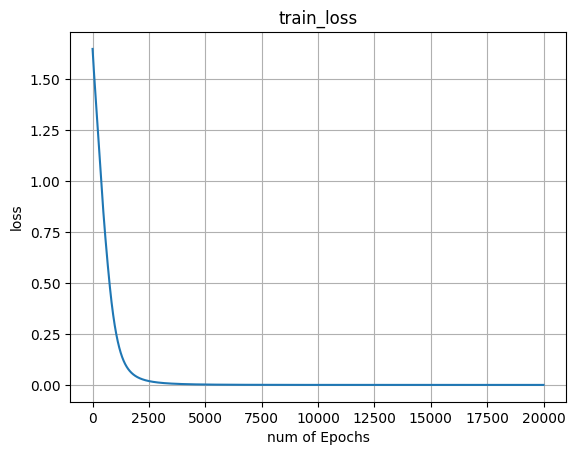

In [219]:
# Visualizing losses
train_loss = hist.history['loss']
xc = range(epochs)

plt.plot(xc, train_loss)

plt.figure(1, figsize=(7,5))
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)

In [220]:
# Print values of all the weights and bias of all the neurons of the Neural Network
for layerNum, layer in enumerate(model.layers):
  print('Layer Number = ', layerNum)

  print('Weights Values =')
  weights = layer.get_weights()[0]
  print(weights)

  print('Bias Values =')
  biases = layer.get_weights()[1]
  print(biases)
  print('================')

Layer Number =  0
Weights Values =
[[ 2.860581    2.1481082 ]
 [-0.4761421   0.00759786]
 [-2.7486436  -3.4676216 ]
 [-3.0664604   1.7627332 ]
 [ 2.8848202  -4.0271883 ]]
Bias Values =
[0.0561588 0.9269524]
Layer Number =  1
Weights Values =
[[-3.6939366  -0.32684004  2.310731    2.1638322  -2.9835618 ]
 [-2.9393566   0.5203804   3.3696737  -1.8057035   3.000466  ]]
Bias Values =
[-0.3447765 -1.0261861  1.0012139  1.5955858  1.4248393]


In [226]:
# Print values of all the weights of layer 1
for layerNum, layer in enumerate(model.layers):
  weights = layer.get_weights()[0]

  biases = layer.get_weights()[1]
  break

print(weights)
print(biases)

[[ 2.860581    2.1481082 ]
 [-0.4761421   0.00759786]
 [-2.7486436  -3.4676216 ]
 [-3.0664604   1.7627332 ]
 [ 2.8848202  -4.0271883 ]]
[0.0561588 0.9269524]


In [227]:
# Word2Vec vectors
Word2Vec = weights + biases
print(Word2Vec)

[[ 2.9167397   3.0750606 ]
 [-0.41998333  0.9345503 ]
 [-2.6924849  -2.5406692 ]
 [-3.0103016   2.6896856 ]
 [ 2.940979   -3.100236  ]]


In [228]:
# vector in DF
w2v_df = pd.DataFrame(Word2Vec, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,Learning.,2.916740,3.075061
1,NLP.,-0.419983,0.934550
2,deep,-2.692485,-2.540669
3,enjoy,-3.010302,2.689686
4,flying.,2.940979,-3.100236


<function matplotlib.pyplot.show(close=None, block=None)>

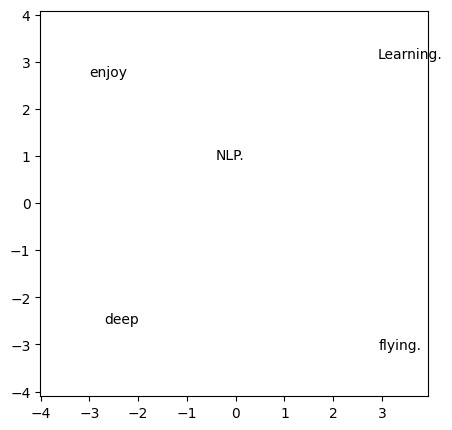

In [231]:
fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
  ax.annotate(word, (x1,x2))

PADDING = 1.0
x_axis_min = np.amin(Word2Vec, axis=0)[0]- PADDING
y_axis_min = np.amin(Word2Vec, axis=0)[1]- PADDING
x_axis_max = np.amax(Word2Vec, axis=0)[0]+ PADDING
y_axis_max = np.amax(Word2Vec, axis=0)[1]+ PADDING

plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)
plt.rcParams['figure.figsize'] = (5,5)

plt.show